In [2]:
import numpy as np

#Importing some standard Qiskit Libraries:
from qiskit import QuantumCircuit
from qiskit import execute
from qiskit import Aer
from qiskit import IBMQ

from qiskit.compiler import transpile
from qiskit.compiler import assemble

from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

#Loading my IBM Q account:
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-09-13 13:51:53,218: Credentials are already in use. The existing account in the session will be replaced.


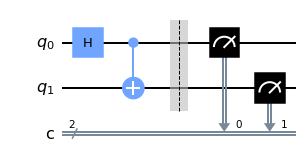

In [3]:
#Generating a Quantum circuit with 2 qubits and 2 classical registers
qCircuit = QuantumCircuit(2,2)

#Add a Hadamard Gate to qubit 1
qCircuit.h(0)
#Add a CNOT/CX gate, with qubit 0 being the control qubit and qubit 1 being the target qubit
qCircuit.cx(0, 1)

#Create a barrier to separate the circuit into different sections (to make it easier to understand)
qCircuit.barrier()

#Measure the value of each qubit, by mapping each qubit to the corresponding classical register
qCircuit.measure(range(2), range(2))

qCircuit.draw()

{'11': 523, '00': 501}


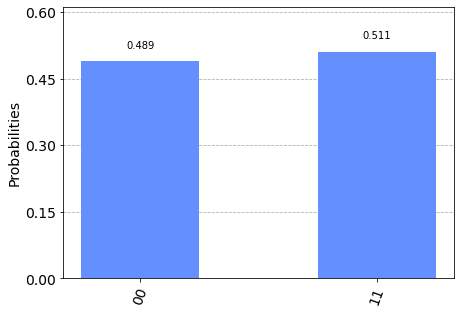

In [4]:
#We now have a quantum circuit! Now we have to actually run it.
#Firstly, let's run it on a simulator, the QASM Simulator specifically:

#We firstly obtain the QASM Simulator backend:
backendQASM = Aer.get_backend("qasm_simulator")

#And then run the job of simulating qCircuit on this backend, 1024 times (also called shots):
jobSimulator = execute(qCircuit, backendQASM, shots = 1024)

#We then extract the result from this jobSimulator:
resultSimulator = jobSimulator.result()

#We then print out the number of times the state '00' and '11' are measured over all 1024 shots:
print(resultSimulator.get_counts(qCircuit))
#Plotting the Histogram of the above data:
plot_histogram(resultSimulator.get_counts(qCircuit))

#Ideally it should be 512 for both states, but the QASM Simulator takes into account errors

In [5]:
#We can figure out all of the available backends to run our qCircuit on via:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_m

{'00': 783, '01': 56, '10': 111, '11': 1098}


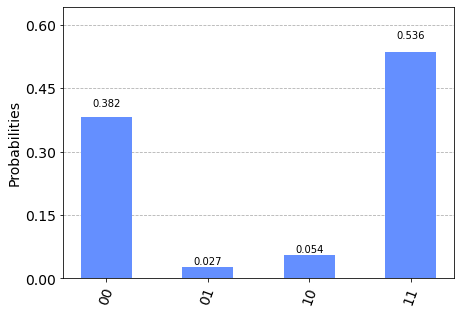

In [6]:
#Say we want to run qCircuit on ibmq_santiago:

#Firstly, we need to set a new backend to that particular quantum computer:
backendSantiago = provider.get_backend("ibmq_santiago")

#We can copy the same code we used to execute qCircuit on the QASM Simulator, except we change the backend:
jobSantiago = execute(qCircuit, backendSantiago, shots = 2048)

#We then extract the result from this jobSimulator:
resultSantiago = jobSantiago.result()

#We then print out the number of times the state '00' and '11' are measured over all 1024 shots:
print(resultSantiago.get_counts(qCircuit))
#Plotting the Histogram of the above data:
plot_histogram(resultSantiago.get_counts(qCircuit))


#Notice the vastly greater amounts of error!